# WAKY plotting 

In [1]:
# -- Dependencies --
import sys
import numpy as np 
import pandas as pd 
import kwakpriv 

from w_transform import HaarTransform, InvHaarTransform
from plottingtools import _BinData, _findmin, _findmax
from plottingtools import _NewColorMap, _NSigmaFilter

In [2]:
"""
# Narrow Gaussian 
narrow_signal = 3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.000000000000001,3.000000000000007,3.0000000000000706,3.00000000000065,3.0000000000055183,3.000000000042995,3.000000000307694,3.000000002022463,3.0000000122097465,3.000000067701267,3.0000003447870824,3.0000016127580698,3.000006928695969,3.000027339957209,3.0000990850653886,3.0003298242734324,3.0010083726846575,3.0028315457001598,3.0073028120293213,3.0172989886374015,3.037637030313418,3.0752097298149934,3.1380373942484807,3.232693108163138,3.3602751711358283,3.512329295393724,3.6691571008488015,3.8027328505945075,3.8844596520127057,3.895053632616805,3.8319249275753533,3.710204238607518,3.556860517313898,3.4010270221273133,3.2652558022458282,3.161146245660033,3.0899165293821254,3.046081109116153,3.0216905395744673,3.009377386840974,3.003723551396685,3.00135799108173,3.00045488385941,3.000139948478294,3.0000395457556337,3.000010263503161,3.0000024465573847,3.0000005356476915,3.0000001077127494,3.0000000198938586,3.0000000033746987,3.0000000005257936,3.000000000075242,3.0000000000098894,3.0000000000011937,3.0000000000001323,3.0000000000000133,3.0000000000000013,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0

# Wide Gaussian 
wide_signal = 3.0000033539878546,3.0000058488975783,3.000010071435632,3.0000171243297,3.0000287501830796,3.0000476620241843,3.000078020581907,3.0001261103473524,3.0002012783636234,3.0003172110433978,3.0004936331740266,3.000758516814296,3.0011508823264315,3.0017242548794583,3.0025508025403225,3.003726121845042,3.0053745498840616,3.007654767042216,3.0107653137798214,3.0149494853427647,3.020498903213878,3.027754911217955,3.037106833396554,3.0489860905059487,3.063855234058142,3.082191149807584,3.104462026171687,3.1310981819050996,3.162457485422097,3.1987868349673714,3.240181938484368,3.286548346402074,3.337567247001533,3.3926698273860207,3.4510239410184873,3.5115363423329686,3.5728728316677576,3.6334973367583325,3.6917293366717456,3.7458172611747482,3.7940237640335828,3.8347172811833423,3.866463242305997,3.8881078657984274,3.8988477257511738,3.8982792456932285,3.886423868534999,3.8637267141836276,3.8310288419905176,3.789515527784549,3.7406449897906837,3.6860635355681444,3.627513999578452,3.566744527988733,3.5054242629228494,3.445071383443768,3.3869974389745003,3.332270163230655,3.281695191018927,3.2358155042635377,3.194926153221297,3.1591009245722637,3.128227191123512,3.1020451547922256,3.0801880187009862,3.062220201253852,3.047671429422088,3.0360653184766155,3.0269417748934435,3.0198731847085636,3.0144748332474944,3.010410330175116,3.007392992621824,3.0051841895945013,3.0035896021250403,3.0024542374878775,3.001656882427115,3.0011045150361797,3.000727036822725,3.0004725480950043,3.0003032776878067,3.0001921939614125,3.0001202662724706,3.000074310947248,3.0000453384405685,3.000027313992994,3.000016248326725,3.000009544142772,3.00000553566813,3.0000031703557553,3.000001792878196,3.000001001148283,3.000000552014979,3.0000003005440625,3.0000001615735536,3.0000000857703606,3.000000044958212,3.000000023269425,3.0000000118923342,3.0000000060014114,3.000000002990505,3.0000000014714328,3.0000000007148935,3.000000000342963,3.000000000162464,3.0000000000759925,3.0000000000350986,3.000000000016007,3.0000000000072085,3.0000000000032054,3.0000000000014078,3.00000000000061,3.000000000000261,3.0000000000001106,3.000000000000046,3.0000000000000195,3.000000000000008,3.0000000000000036,3.0000000000000013,3.000000000000001,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0

# Bump Dip 
bumpdip_signal = 3.0000000029643425,3.0000000099502255,3.000000032129832,3.000000099805632,3.0000002982446663,3.000000857356302,3.0000023709424277,3.0000063074185475,3.0000161418470923,3.0000397397999246,3.000094117176262,3.0002144285976113,3.0004699664699417,3.0009908798649687,3.002009761321011,3.0039213568439846,3.0073602940988104,3.0132898044068117,3.0230835734663275,3.038569404602094,3.061991131767696,3.0958405658632686,3.1425217699204904,3.203841270073022,3.2803694330011757,3.3707801677607616,3.4713286839776547,3.5756459498884503,3.6749944950939444,3.7590400521620246,3.8170664875183062,3.8394362642529467,3.8190198964214783,3.7523166240046493,3.6400668296005696,3.487284350520077,3.302764427043906,3.098205354662973,2.887099654622094,2.6835183001311576,2.5008670808191695,2.3506752972889666,2.2414985004834644,2.1780619689862517,2.1608014685020027,2.185935668670619,2.2461180804782366,2.331587125931207,2.4316072699069062,2.5359207722283545,2.6359367337221413,2.725467420491978,2.8009486745024597,2.8612067685525644,2.906920640395176,2.9399583906983286,2.962744912093035,2.9777635046264814,2.9872325840534866,2.9929481833682083,2.9962531713791813,2.998084890127021,2.999058344508571,2.9995545901731298,2.9997973262330078,2.999911283242894,2.9999626419331356,2.9999848666907907,2.999994102685469,2.999997789219547,2.999999202725412,2.999999723406968,2.9999999076906763,2.9999999703639078,2.9999999908469177,2.9999999972805265,2.9999999992227275,2.999999999786286,2.999999999943472,2.9999999999856164,2.9999999999964793,2.999999999999171,2.999999999999812,2.999999999999959,2.999999999999991,2.9999999999999982,2.9999999999999996,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0

# Oscillatory signal 
osc_signal = 3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3.0112203898509495,3.196633084649952,3.3735862874666807,3.534467168531764,3.6723543568770642,3.78131570956569,3.8566635226383195,3.8951562041639476,3.895137733075102,3.856608904029651,3.7812272932232633,3.6722359466233185,3.5343238585785612,3.3734242432535875,3.196459277596473,3.0110422974341207,2.825150258729224,2.6467805552763846,2.4836069571277077,2.342649471865924,2.229972331858318,2.150423100596949,2.1074241222170875,2.102825286392681,2.13682444291515,2.2079588898565965,2.3131683015112223,2.447926388847166,2.6064356282106904,2.7818766807204502,2.9667017719024273,3.1529594098713156,3.332636472126184,3.4980029438007683,3.64194447613856,3.7582684579576884,3.841970432387141,3.8894493971701163,3.8986627259468456,3.869214045538037,3.8023702885977264,3.7010071880012236,3.5694855578929134,3.413463683995043,3.239653894467693,3.0555337840582792,2.8690245151721916,2.688150035903261,2.5206918760479495,2.373854372369753,2.2539547256961625,2.1661512241225838,2.1142213246263086,2.1003991403994844,2.1252793254742777,2.187791491688227,2.2852462586157367,2.4134509553188286,2.566889996229685,2.7389621710857304,2.9222646402978945,3.108911417785089,3.29087263959801,3.460320022415207,3.60996364969536,3.733365596368898,3.8252168993976823,3.8815659584550595,3.899988540537956,3.879692074621509,3.8215497494216164,3.728062947321283,3.6032536306175684,3.4524913098170456,3.282262038099992,3.09988937020697,2.9132192905742853,2.730282665649442,2.558949742265874,2.4065915561485443,2.279762817336138,2.1839199153320608,2.12318617588541,2.1001744684571753,2.115874796102206,2.1696117038426754,2.2590733378977594,2.3804109055917153,2.5284042570047838,2.696686464760858,2.8780177401447853,3.0645969012090943,3.248396992978784,3.421510620798286,3.576490139988845,3.7066680662746347,3.8064439223725817,3.871525180114353,3.8991119323579606,3.888017349787081
"""
print()

In [3]:
inputFile = pd.read_csv("./Fig1_dsets.csv")
signal = inputFile['osc']
# Hypothesis is a flat dist y=3
flat_hypothesis = np.ones_like(signal)*3

### Narrow

In [4]:
# -- Call the nsets method --
# extr_sets is an instance of the nsets method. If outputdir is not none, a directory will be created 
# with the data from the attributes of this class in csv files.
nsets = kwakpriv.nsets_toy(signal, flat_hypothesis, nsets=3*10**2,
                        seed=123,
                        extrapolate=False,
                        fastGaussian=False,
                        outputdir=None)


In [5]:
# Save the attributes of extr_nsets
Level = nsets.Level
Coeffs = nsets.WaveDec_data 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import Normalize, LogNorm
from matplotlib.colorbar import ColorbarBase
from matplotlib import cm

In [7]:
def Fig1_osc(nsigma_percent=1):
    
    data=signal
    hypothesis=flat_hypothesis
    nsigma=Coeffs
    firsttrend=False
    filled=True
    xlabel=None
    textsize=15
    textpos=0.90
    ticksize=14
    markersize=3
    Coeffs_color='#69B4F2'
    Firsttrend_color=Coeffs_color
    Data_color='#0782B0'
    
    WaveDec_data = HaarTransform(data)
    Ccoeffs = WaveDec_data[:-1]
    FirstTrend = WaveDec_data[-1]
    Level = len(Ccoeffs)
    
    nlevels = Level if firsttrend==False else Level+1
    nrows = nlevels+1 # the first panel is the data histogram
    if nsigma is not None:
        nrows += 1 # add another panel for the generating function
    ratio = [1.5]
    ratio += [1]*(nrows-1)
    
    histtype='bar'
    coeffs_color=Coeffs_color
    firsttrend_color=Firsttrend_color
    
    scale='linear'
        
    figsize=(7, 9)
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(ncols=1, nrows=nrows,
                           height_ratios=ratio,
                           hspace=0)
    axs = [fig.add_subplot(gs[i,0]) for i in range(nrows)]
    
    # Fill out top panel
    data_hist, _, data_center, data_width = _BinData(data, bins=2**Level)
    axs[0].bar(data_center, data_hist, align='center',
               width=data_width, color=Data_color)
    axs[0].tick_params(axis='both', labelsize=ticksize)
    axs[0].text(x=textpos, y=.63, s='Data', fontsize=textsize,
                bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 2},
                transform=axs[0].transAxes)
    axs[0].set_yscale(scale)
    
    nsigCcoeffs = nsigma
    cut = str(nsigma_percent*100) + '%'

    nsigma_min=None
    DeltaCoeff = _NSigmaFilter(data, hypothesis, nsigma, nsigma_min, nsigma_percent)
    ReconstructedData = InvHaarTransform(DeltaCoeff, normalize=False)
    RecData = np.divide(ReconstructedData, np.sqrt(hypothesis))
    
    # ----- NEW : 09-22-2019 -----------------------------------------------------------
    # added injected signal to the second panel 
    injected_signal = signal-flat_hypothesis  
    InjData = np.divide(injected_signal, np.sqrt(hypothesis))
    inj_hist, _, inj_center, inj_width = _BinData(InjData, bins=2**Level)
    #axs[1].plot(inj_center, inj_hist, 'd', markersize=markersize+1, 
    #            color='#539C3C', 
    #            label='{}'.format('Injected Signal'))
    axs[1].plot(inj_center, inj_hist, linewidth=markersize+1, color='#21BB3A')
    # ----------------------------------------------------------------------------------

    rec_hist, _, rec_center, rec_width = _BinData(RecData, bins=2**Level)
    axs[1].plot(rec_center, rec_hist, 'o', markersize=markersize, color='#E67E22',
                label='{}'.format(cut)) # new
    axs[1].set_ylim(bottom=-.95, top=.95)
    axs[1].tick_params(axis='y', bottom=False, labelbottom=False, labelsize=ticksize)
    axs[1].tick_params(axis='x', labelbottom=False)
    axs[1].set_yscale('linear')
    axs[1].legend(edgecolor="black", fancybox=False, borderpad=.2, 
                  handletextpad=0.0, handlelength=1, markerscale=1, 
                  fontsize=textsize-1,
                  #framealpha=0.5,  # transparency of the legend box
                  #loc='lower left', bbox_to_anchor=(0., 0.5, .5, .5))  # NEW
                 bbox_to_anchor=(0., 0.45, .5, .5))
    
    s = 2 # in which panel to start 
    # Level 7
    l=0
    bins=2**(Level-l-1)
    coeffs = Ccoeffs[l]
    n, binning, patches = axs[l+s].hist(x=range(bins), bins=bins, weights=coeffs, histtype=histtype, color=coeffs_color)
    axs[l+s].plot(binning, np.zeros_like(binning), color='black', linewidth=0.5)
    #print(Level-l, min(n), max(n))
    #7 -0.18664677748719471 0.1854169801623522
    axs[l+s].set_ylim(bottom=-0.33, top=0.33)
    axs[l+s].tick_params(axis='y', bottom=False, labelbottom=False, labelsize=ticksize)
    axs[l+s].tick_params(axis='x', labelbottom=False, labelsize=ticksize)
    axs[l+s].set_xticks(np.linspace(binning[0], binning[-1], 2**(Level-1) ))
    lev = Level-l-1
    axs[l+s].text(x=textpos, y=.63, s=r'$\ell={%.1i}$'%(lev+1), fontsize=textsize,
                  bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 2},
                  transform=axs[l+s].transAxes)
    axs[l+s].set_yscale(scale)
    
    # Level 6
    l=1
    bins=2**(Level-l-1)
    coeffs = Ccoeffs[l]
    n, binning, patches = axs[l+s].hist(x=range(bins), bins=bins, weights=coeffs, histtype=histtype, color=coeffs_color)
    axs[l+s].plot(binning, np.zeros_like(binning), color='black', linewidth=0.5)
    #print(Level-l, min(n), max(n))
    #6 -0.7313488728426023 0.7380131274505191
    axs[l+s].set_ylim(bottom=-1.2, top=1.2)
    axs[l+s].tick_params(axis='y', bottom=False, labelbottom=False, labelsize=ticksize)
    axs[l+s].tick_params(axis='x', labelbottom=False, labelsize=ticksize)
    axs[l+s].set_xticks(np.linspace(binning[0], binning[-1], 2**(Level-1) ))
    lev = Level-l-1
    axs[l+s].text(x=textpos, y=.63, s=r'$\ell={%.1i}$'%(lev+1), fontsize=textsize,
                  bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 2},
                  transform=axs[l+s].transAxes)
    axs[l+s].set_yscale(scale)
        
    # Level 5
    l=2
    bins=2**(Level-l-1)
    coeffs = Ccoeffs[l]
    n, binning, patches = axs[l+s].hist(x=range(bins), bins=bins, weights=coeffs, histtype=histtype, color=coeffs_color)
    axs[l+s].plot(binning, np.zeros_like(binning), color='black', linewidth=0.5)
    #print(Level-l, min(n), max(n))
    #5 -2.7228788593183157 2.8170624338635015
    axs[l+s].set_ylim(bottom=-3.5, top=3.5)
    axs[l+s].tick_params(axis='y', bottom=False, labelbottom=False, labelsize=ticksize)
    axs[l+s].tick_params(axis='x', labelbottom=False, labelsize=ticksize)
    axs[l+s].set_xticks(np.linspace(binning[0], binning[-1], 2**(Level-1) ))
    lev = Level-l-1
    axs[l+s].text(x=textpos, y=.63, s=r'$\ell={%.1i}$'%(lev+1), fontsize=textsize,
                  bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 2},
                  transform=axs[l+s].transAxes)
    axs[l+s].set_yscale(scale)
    
    # Level 4
    l=3
    bins=2**(Level-l-1)
    coeffs = Ccoeffs[l]
    n, binning, patches = axs[l+s].hist(x=range(bins), bins=bins, weights=coeffs, histtype=histtype, color=coeffs_color)
    axs[l+s].plot(binning, np.zeros_like(binning), color='black', linewidth=0.5)
    #print(Level-l, min(n), max(n))
    #4 -9.325488098118651 9.47110302899501
    axs[l+s].set_ylim(bottom=-13, top=13)
    axs[l+s].tick_params(axis='y', bottom=False, labelbottom=False, labelsize=ticksize)
    axs[l+s].tick_params(axis='x', labelbottom=False, labelsize=ticksize)
    axs[l+s].set_xticks(np.linspace(binning[0], binning[-1], 2**(Level-1) ))
    lev = Level-l-1
    axs[l+s].text(x=textpos, y=.63, s=r'$\ell={%.1i}$'%(lev+1), fontsize=textsize,
                  bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 2},
                  transform=axs[l+s].transAxes)
    axs[l+s].set_yscale(scale)
    
    # Level 3
    l=4
    bins=2**(Level-l-1)
    coeffs = Ccoeffs[l]
    n, binning, patches = axs[l+s].hist(x=range(bins), bins=bins, weights=coeffs, histtype=histtype, color=coeffs_color)
    axs[l+s].plot(binning, np.zeros_like(binning), color='black', linewidth=0.5)
    #print(Level-l, min(n), max(n))
    #3 -1.4475640189335337 10.38878788513508
    axs[l+s].set_ylim(bottom=-3, top=14)
    axs[l+s].tick_params(axis='y', bottom=False, labelbottom=False, labelsize=ticksize)
    axs[l+s].tick_params(axis='x', labelbottom=False, labelsize=ticksize)
    axs[l+s].set_xticks(np.linspace(binning[0], binning[-1], 2**(Level-1) ))
    lev = Level-l-1
    axs[l+s].text(x=textpos, y=.63, s=r'$\ell={%.1i}$'%(lev+1), fontsize=textsize,
                  bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 2},
                  transform=axs[l+s].transAxes)
    axs[l+s].set_yscale(scale)
    
    # Level 2
    l=5
    bins=2**(Level-l-1)
    coeffs = Ccoeffs[l]
    n, binning, patches = axs[l+s].hist(x=range(bins), bins=bins, weights=coeffs, histtype=histtype, color=coeffs_color)
    axs[l+s].plot(binning, np.zeros_like(binning), color='black', linewidth=0.5)
    #print(Level-l, min(n), max(n))
    #2 -0.14357836448225214 -0.05675736870084336
    axs[l+s].set_ylim(bottom=-0.2, top=0.05)
    axs[l+s].tick_params(axis='y', bottom=False, labelbottom=False, labelsize=ticksize)
    axs[l+s].tick_params(axis='x', labelbottom=False, labelsize=ticksize)
    axs[l+s].set_xticks(np.linspace(binning[0], binning[-1], 2**(Level-1) ))
    lev = Level-l-1
    axs[l+s].text(x=textpos, y=.63, s=r'$\ell={%.1i}$'%(lev+1), fontsize=textsize,
                  bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 2},
                  transform=axs[l+s].transAxes)
    axs[l+s].set_yscale(scale)
    
    # Level 1
    l=6
    bins=2**(Level-l-1)
    coeffs = Ccoeffs[l]
    n, binning, patches = axs[l+s].hist(x=range(bins), bins=bins, weights=coeffs, histtype=histtype, color=coeffs_color)
    axs[l+s].plot(binning, np.zeros_like(binning), color='black', linewidth=0.5)
    #print(Level-l, min(n), max(n))
    #1 -0.7160836128567212 -0.7160836128567212
    axs[l+s].set_ylim(bottom=-.1, top=0.05)
    axs[l+s].tick_params(axis='y', bottom=False, labelbottom=False, labelsize=ticksize)
    axs[l+s].tick_params(axis='x', labelbottom=False, labelsize=ticksize)
    axs[l+s].set_xticks(np.linspace(binning[0], binning[-1], 2**(Level-1) ))
    lev = Level-l-1
    axs[l+s].text(x=textpos, y=.63, s=r'$\ell={%.1i}$'%(lev+1), fontsize=textsize,
                  bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 2},
                  transform=axs[l+s].transAxes)
    axs[l+s].set_yscale(scale)
        
    title="Oscillations"
    titlesize=18
    fig.suptitle(title, fontsize=titlesize, y=0.92)
    fig.text(x=0.5, y=0.1, s=xlabel, fontsize=textsize)
        
    plt.savefig("Osc.pdf", bbox_inches='tight', format='pdf')
    plt.show()
        

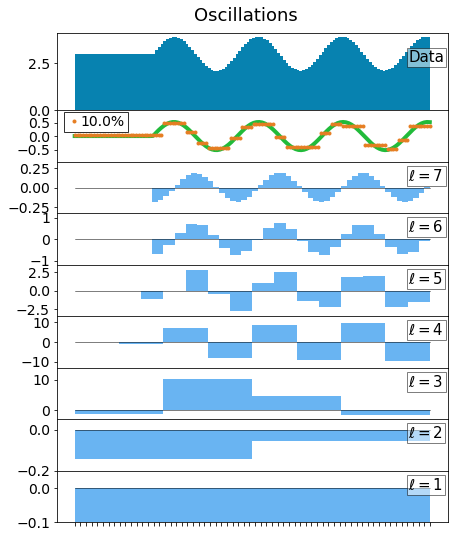

In [8]:
r_percent=10
Fig1_osc(r_percent*0.01)